# Particle in a Box

* **Author:Zizhuang Liu**

* **Date:2025/10/13**

* **Time spent on this assignment:$\sim2h$**

In [96]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation
from IPython.display import HTML
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['FuncAnimation','HTML','resetMe','scipy','np','plt','math','jax','jnp','jit','grad','HTML','animation','animateMe_singlePendula']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
resetMe()
import datetime;datetime.datetime.now()

datetime.datetime(2025, 10, 14, 3, 29, 56, 692591)

## Exercise 1. Particle in a Infinite Box

### a. Hamiltonian and Eigenvalues

Consider a particle in a box of length 20 spanning $-10 \leq x \leq 10$

We are going to start by solving the time-independent schrodinger equation:

$$-\frac{\hbar^2}{2m} \frac{\partial^2 \Psi}{\partial x^2}  + V\Psi = E\Psi $$

$$\left( -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}  + V \right) \Psi = E\Psi $$

While this looks like a differential equation,we can actually think of it as a matrix equation - i.e. $H\Psi = E \Psi$ where

$$ H \equiv \left( -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}  + V \right)  $$

For a particle in a box, the V=0 (other then the infinite hard walls) and so we can ignore it for here.  We will have to pay more attention to it when we have a finite-walled box. We will also work in units where $\hbar=m=1$.  For most of this assignment we will be working in the $x$ basis.  

To write it as a matrix equation, we need to discretize $x$.  We will do that in $\Delta x$ steps of 0.01 as
```
def SetupGrid(L,delta_x):
    n=int(round(L/delta_x))+1
    xs=np.linspace(-L/2,L/2,n,endpoint=True)
    return xs

xs=SetupGrid(20,0.01)
```

This gives us a list of x (stored in `xs`) separated by steps of 0.01.  You can print it out to see it.


Now we need to figure out what the matrix is $H$.  To get the matrix for the first piece, we will use from calculus that the stencil for a second derivative is

$$-\frac{1}{2} \frac{\partial^2 }{\partial x^2} \equiv -\frac{1}{2}  \frac{f(x+\delta) - 2 f(x) + f(x-\delta)}{\delta^2}$$

We can let the rows and columns of the matrix $M$ to be indexed by the values of $x$

This gives us a matrix of

$$
H[i,j] = \begin{cases}
\frac{1}{2} \frac{2}{(\delta x)^2} & \text{if } i == j \\
-\frac{1}{2}  \frac{1}{(\delta x)^2} & \text{if } \textrm{abs}(i-j)== 1\\
0 & \text{otherwise }
\end{cases}
$$

Your first step is to make a matrix $H$ in python and fill it out as above.

To build a matrix of zeros you can do
`H=np.zeros((len(xs),len(xs)))`
which builds a matrix of size len(xs) x len(xs)

You now need to loop over the rows of your matrix and, for each row, fill out the three (or less at the edges) non-zero matrix elements of your matrix.  Do not loop over both the rows and columns (or it will take forever).

If you're feeling comfortable with python and numpy, you can also use `np.diag` to set it up more efficiently.

As a sanity check, display the upper left of your matrix by doing `plt.matshow(H[0:10,0:10)`.  It should look like it has a stripe down the diagonal and two identically colored stripes down the off-diagonal.


Once you've created H, you can find the eigenvalues and eigenvectors by doing
```
e,v=np.linalg.eigh(H)
```

The eigenvalues are now `e[0],e[1],`... and the eigenstates are now `v[:,0], v[:,1],`...  (a common bug is to instead thing they are `v[0]`)

Let us also check that we actually satisfy the equation above.  For our second eigenvalue `v[:,1]` let's verify that $Hv_1 = Ev_1$ (i.e. `H @ v[:,1]` is equal to `e[1] * v[:,1]`).  You can check they are the same by subtracting them and making sure the result is essentially 0 (i.e term less then 1e-12).


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [97]:
###ANSWER HERE
def SetupGrid(L,delta_x):
    n=int(round(L/delta_x))+1
    xs=np.linspace(-L/2,L/2,n,endpoint=True)
    return xs

xs=SetupGrid(20,0.01)
H=np.zeros((len(xs),len(xs)))
for i in range(len(xs)):
  for j in range(len(xs)):
    if i==j:
      H[i,j]=1/0.01**2
    if abs(i-j)==1:
      H[i,j]=-1/0.01**2/2
e,v=np.linalg.eigh(H)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now let us plot some of this information.  First go ahead and plot the lowest five eigenvalues.  You should also plot the expected answer

$$
E_n = \frac{\pi^2}{2L^2}n^2
$$

for $n \in \{1,2,...\}$

To plot something you do
```
plt.plot(x,y)
```
where `x` and `y` are lists (or numpy arrays) or points.

In the case of the eigenvalues your `x` is going to be `[1,2,3,4,5]` and `y` is going to be `e[0:5]`  After you've made all the plots that you want to show up on one graph you need to call `plt.show()`  To label the axis of your plot you can do things like
```
plt.xlabel("n")
plt.ylabel("eigenvalue")
```

Notice that the lowest energy is not zero.  This is a result of the zero-point energy of the particle in the box.  If you reran this with a smaller box, you'd also get a higher energy.   

You may also notice that if you plot enough eigenvalues, you eventually get energies which don't agree with the theoretical prediction.  This is essentially because there is a point at which it notices the discretization $\delta x$ of the box we are using.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0, 0.5, 'eigenvalue')

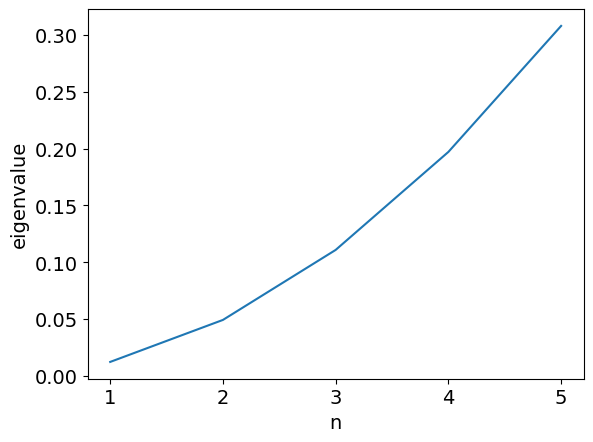

In [98]:
###ANSWER HERE
plt.plot(np.arange(5)+1,e[0:5])
plt.xlabel("n")
plt.ylabel("eigenvalue")

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Eigenvectors

We would also like to look at the eigenvectors.  We know that the eigenvectors are supposed to be orthonormal.  This means that their dot product $e_i^\dagger e_j$ (also written $\langle e_i | e_j\rangle$) is either zero if they are different ($i \neq j$) or equal to one (if they are the same).

Go ahead and verify that the three lowest states are orthonormal with respect to each other.  (Note: numbers that are near 1e-16 you should treat as zero).

In python $a^\dagger b$ can be computed by
```
np.vdot(a,b)
```
or
```
a.conjugate() @ b.T
```
In addition to verifying this, we would like to make sure that we got the same answer as we computed theoretically. Plot the lowest three eigenvalues. On top of those eigenvalues plot the three expected values as well

$$
\Psi(x) = \begin{cases}
\sqrt{2\delta x/L} \sin((n\pi/L) x)  \text{ if n is even}\\
\sqrt{2\delta x/L} \cos((n\pi/L) x)  \text{ if n is odd}\\
\end{cases}
$$

Remember you already have `xs` defined and so can do things like `np.cos(xs)`


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

-3.046572545844095e-15 -4.907861511214432e-17 1.4639864607773682e-15


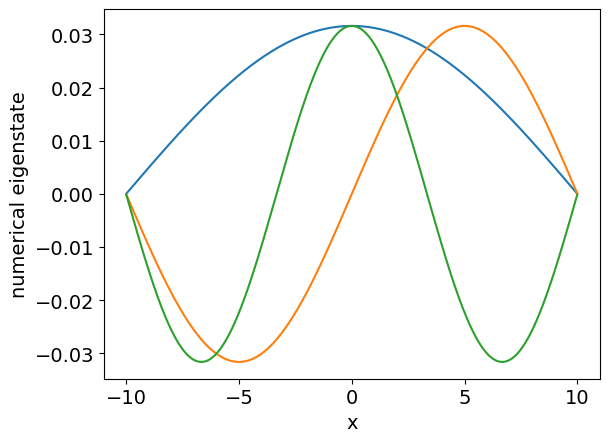

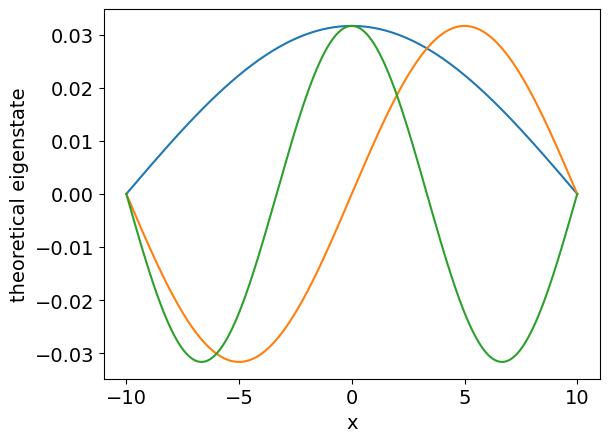

In [99]:
###ANSWER HERE
print(np.vdot(v[:,0],v[:,1]),np.vdot(v[:,0],v[:,2]),np.vdot(v[:,2],v[:,1]))
plt.plot(xs,v[:,0])
plt.plot(xs,v[:,1])
plt.plot(xs,v[:,2])
plt.xlabel('x')
plt.ylabel('numerical eigenstate')
plt.show()
plt.plot(xs,(2*0.01/20)**(1/2)*np.cos(np.pi*xs/20))
plt.plot(xs,(2*0.01/20)**(1/2)*np.sin(2*np.pi*xs/20))
plt.plot(xs,(2*0.01/20)**(1/2)*np.cos(3*np.pi*xs/20))
plt.xlabel('x')
plt.ylabel('theoretical eigenstate')
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 2. Expectation values

### a. Measuring

In the previous problem, you plotted the wave-function amplitude $\Psi(x)$ for various eigenstates of the Hamiltonian. Experimentally, though, you aren't measuring the amplitudes.  Instead you are measuring the probability or expectation values.  

In this section, let's start by working with the wave-function

$$|\Psi\rangle = \sqrt{0.1}|v_0\rangle + \sqrt{0.25}|v_1\rangle + i \sqrt{0.65}|v_2\rangle $$

where $|v_0\rangle$, $|v_1\rangle$, $|v_2\rangle$ are the eigenstates you computed for the particle in a box.  (In python to get imaginary numbers you have to use 1.j or the third term above is `1.j*np.sqrt(0.65)*v[:,2]`)

Plot the probability $|\Psi(x)|^2$ of the state above. If the particle in the box happened to be in this state, and you measured its position, this is the probability you would see it at a given position.  

Now let's simulate measuring our wave-function in the position basis.  If you do `x=np.random.choice(xs, p=np.abs(psi)**2)`
it will choose an $x$ appropriately from the wave-function.    Write a loop which simulates 200 measurements and then plot each of these measurements on the x-axis of your wave-function plot - i.e. `plt.plot(x,0,'.',color='red')`.

What you should notice is that most of these points are centered in the area where the probability is highest.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

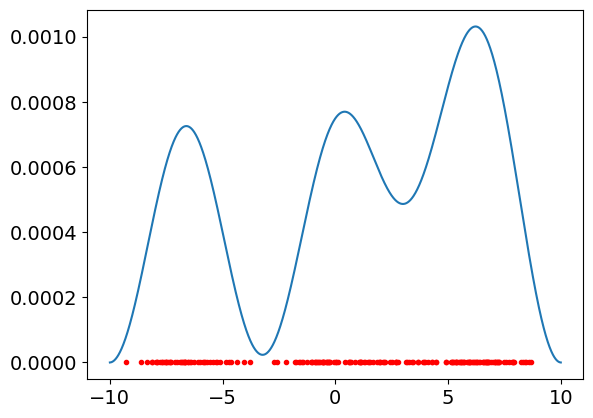

In [100]:
###ANSWER HERE
psi=np.sqrt(0.1)*v[:,0]+np.sqrt(0.25)*v[:,1]+1.j*np.sqrt(0.65)*v[:,2]
plt.plot(xs,np.abs(psi)**2)
for i in range(200):
  x=np.random.choice(xs, p=np.abs(psi)**2)
  plt.plot(x,0,'.',color='red')


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Expectation in the diagonal basis

When an experimentalist measures their particle many times, they could report all the places where the electron is.  But often it is easier just to report the average of those locations. This is called the expectation value of $x$ or $\langle x \rangle$.  

In the next few parts, we will compute the expectation value of $x$ in three different ways:
First, let's just take the code that you wrote above but now measure 10,000 times. Instead of plotting it, just report the aveage of all the $x$ that you see.

In addition, you can take all 10,000 x's you measured and report the standard deviation - `np.std(all_x)`


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [101]:
###ANSWER HERE
all_x=np.zeros(10000)
for i in range(10000):
  x=np.random.choice(xs,p=np.abs(psi)**2)
  all_x[i]=x
print(np.mean(all_x),np.std(all_x))

1.1666770000000002 5.277639687177499


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now instead of doing it with the random measurements we can actually just use the fact that we know the probability of $x$ at every $x$ to compute an average as

$$\sum_x P(x) x$$
where $P(x) = |\Psi(x)|^2$.   Go ahead and compute this using python.  It will be useful to use `np.sum(...)` which can sum up a numpy array and you can pointwise multiply two arrays $a$ and $b$ by doing `a*b`.  Remember you already have the array xs.  You should get an answer close to your answer above but it doesn't have to be exactly the same (because the answer above involved some randomness)

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [102]:
###ANSWER HERE
print(np.sum(np.abs(psi)**2*xs))

1.140359542220247


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In addition to getting the expectation value of $x$, you should also get the expectation value of $x^2$, $\langle x^2 \rangle$ - i.e. $\sum_x P(x) x^2$.   From $\langle x \rangle$ and $\langle x^2 \rangle$, we can compute

$$ \Delta x = \sqrt{\langle X^2 \rangle - \langle X \rangle^2}$$

which quantifes the standard deviation of the position.   

Compute this standard deviation as well.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [103]:
###ANSWER HERE
X2=np.sum(np.abs(psi)**2*xs**2)
X=np.sum(np.abs(psi)**2*xs)
print((X2-X**2)**(1/2))

5.228157331353103


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

We would also like to find the energy, which is the expectation value of the Hamiltonian.  This would be $\sum_x P(x) E(x)$ where $E(x)$ is the energy of the state when it is at a particular $x$ (for example, the energy of the state when you $x=3.2$).  Unfortunately, we don't know what that energy is so this becomes a bit tricky. We will see a more general way to approach this in the next part.

### c. Expectation values (using operators )

So far we've computed expectation values for diagonal observables by evaluating the propbability of a particular value of $x$ and then computing the observable for that value of $x$.   Another approach to computing expectation values is to start with an operator corresponding to that observable $\hat{O}$  and then evaluate

$$ \langle O \rangle = \langle \Psi | \hat{O} |\Psi \rangle$$

An operator $\hat{O}$ is just a matrix in a particular basis.  

For example, to compute the expectation value of the position, we should evaluate it with respect to the $X$ operator.  In the position basis, the $X$ operator is particular simple:   down the diagonal there should be the value of $x$.  Similarly the matrix for the $\hat{X^2}$ operator in the position basis is diagonal with $x^2$ down the diagonal (also equivalent to `X @ X`)

Produce these two operators and evaluate the expectation of the relevant observables - i.e. `psi.conjugate() @ X @ psi.T`

You should get the same answer as before.  On your probability distribution,  plot a vertical line (`plt.axvline(..)`) where the expected value of the position is.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(1.140359542220248+0j)


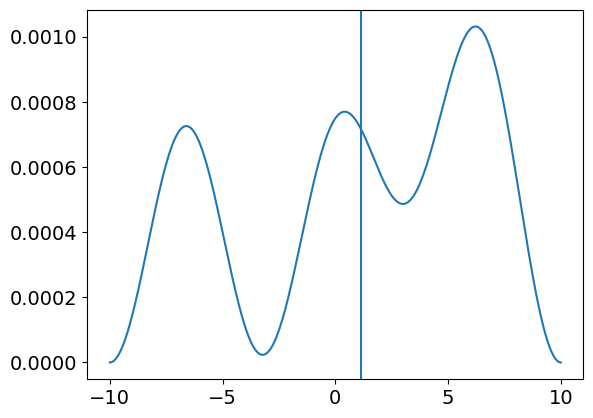

In [104]:
###ANSWER HERE
X=np.diag(xs)
print( psi.conjugate() @ X @ psi.T)
plt.plot(xs,np.abs(psi)**2)
plt.axvline(np.real(psi.conjugate() @ X @ psi.T))

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

The advantage of this approach is that we now can actually compute expectation values with respect to different observables.  For example, we might want the

**Momentum:**

$$\hat{P} = -i\hbar \frac{\partial}{\partial x}$$

In order to represent this in the position basis, we need to use the stencil for the first derivative

$$\frac{\partial}{\partial x} = \frac{f(x+\delta)-f(x-\delta)}{2\delta}$$

As a matrix this will correspond to $-i/(2\delta)$ on the upper right off-diagonal and $i/(2\delta)$ on the lower right off-diagonal.  

Build the matrix for $P$ and compute the expectation value of the momentum.  

**Energy:**

We might also want the expected value of the energy.  The relevant matrix for the energy is actually just the Hamiltonian H.  Go ahead and also compute the expected value of the energy.

Check that the energy is equal to `0.1*e[0]+0.25*e[1]+0.65*e[2]`.  

You can see why this works if you analytically work out what

$$\left(\sqrt{0.1} \langle v_0| + i \sqrt{0.25} \langle v_1| + \sqrt{0.65} \langle v_2|\right) H \left( \sqrt{0.1} | v_0 \rangle + -i \sqrt{0.25} | v_1 \rangle + \sqrt{0.65} | v_2\rangle\right)$$

For this you will need to use the fact that $H |v_i\rangle = \lambda_i |v_i\rangle$ and that the states are orthogonal


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [105]:
###ANSWER HERE
P=np.zeros((len(xs),len(xs)),dtype=complex)
for i in range(len(xs)):
  for j in range(len(xs)):
    if abs(i-j)==1:
      P[i,j]=1.j*abs(i-j)/(i-j)*1/0.01/2
print(np.real(psi.conjugate() @ P @ psi.T))
print(np.real(psi.conjugate() @ H @ psi.T),0.1*e[0]+0.25*e[1]+0.65*e[2])

-0.19330036940952738
0.08557081735907188 0.08557081736036304


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. How do the two approaches for expectation values relate?  (optional)

We've seen two different approaches to computing expectation values.  We'd like to understand how they relate.  For $\langle x^2 \rangle$ it's pretty easy to see what's going on.  Because that matrix is diagonal when we compute `psi @ X2 @ psi.T.conjugate()` we are actually just summing up $\sum_x \psi(x) x^2 \psi^*(x) = \sum_x |\psi(x)|^2 x^2$.  

But what about when we compute the average energy.  We evaluate `psi.conjugate() @ H @ psi.T` which is not a diagonal and it's not obvious how to rewrite it as something like $\sum_x P(x) E(x)$.  

It's an interesting fact that  `H = v @ np.diag(e) @ v.T.conjugate()`   Verify that this is true.

Then we could write `psi.conjugate() @ H @ psi.T` as `psi.conjugate() @ v @ np.diag(e) @ v.T.conjugate() @ psi.T` which is equal to

`(psi.conjugate() @ v) @ np.diag(e) @ (psi.T @ v).conjugate()`

This now does very much look like a diagonal matrix sandwhiched between a "new psi" which is `psi.conjugate() @ v`.  

Let's compute this new `psi_e = psi.conjugate() @ v` and then

* evaluate `psi_e.conjugate() @ np.diag(e) @ psi_e.T` and notice that it is the energy
* and plot the absolute value squared of `psi_e`.  You may find it fruitful to only zoom in to the first ten points (`plt.xlim(0,10)`).  What do you notice?  What's the x-axis and the y-axis representing?

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.08557081736036301+0j)


(0.0, 10.0)

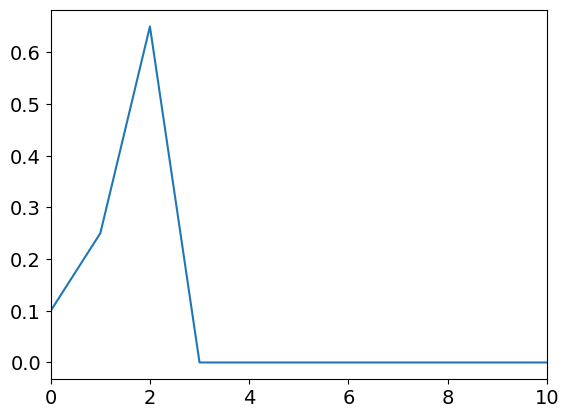

In [106]:
###ANSWER HERE
psi_e = psi.conjugate() @ v
print(psi_e.conjugate() @ np.diag(e) @ psi_e.T)
plt.plot(np.abs(psi_e)**2)
plt.xlim(0,10)
### The x-axis is the quantum number of eigenstates and y-axis is the probability distribution of energy measurement.

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

What we have here is still the wave-function but it's a wave-function written in a different basis.  It's written in the energy basis.  If you measured the energy instead of the position, you would have a 10\% chance of seeing the energy corresponding to $e_0$, a 25\% chance of seeing the energy corresponding to $e_1$ and a 65\% chance of seeing the energy corresponding to $e_2$.

## Exercise 3. Time Evolution

We found the eigenstates by solving the time-independent Schrodinger equation. This equation was originally derived from the time-dependent Schrodinger equation

$$-\frac{\hbar^2}{2m} \frac{\partial^2 \Psi}{\partial x^2}  + V\Psi = i \hbar \frac{\partial}{\partial t}\Psi $$

or more generically

$$ -\frac{i}{\hbar} H \Psi = \frac{\partial}{\partial t}\Psi $$

Let's think for a moment about what this equation is telling us.   It's telling us that the way that the wave-function changes in a moment of time $\delta t$ is by $\frac{i}{\hbar}H\Psi(\delta t )$

This gives us a mechanism to time-evolve our state:

$$\Psi(t+\delta t) = \Psi(t)+ -i \frac{\delta t}{\hbar} H\Psi(t)$$

If we want to time evolve it a time $T$, we get
$$\Psi(t+T) = (1-i \frac{\delta t}{\hbar} H)^{T/\delta t}\Psi(t)$$

In the limit where $\delta t \rightarrow 0$ this is equal to

$$\Psi(t+T) = \exp[-i H \delta t]^{T/\delta t} \Psi(t)$$


This latter formula is much more numerically stable and has the advantage that it is correct for any value of $\delta t$ (which can be easily derived algebraically).

### a. Time Evolution

Again starting with our wave-function

$$|\Psi\rangle = \sqrt{0.1}|v_0\rangle + \sqrt{0.25}|v_1\rangle + i \sqrt{0.65}|v_2\rangle$$

let's do time evolution using a time step of $\Delta t=0.5$ for 400 steps (i.e. to $T=200$). At each time step, save a snapshop of the entire wave-function - i.e. `myData.append(psi)`

To take a matrix exponential, you can use `scipy.linalg.expm`.  It will not work if you just naively call exp.

First, go ahead and plot the wave-function probability at time-steps 0, 50, 200, and 350 all on the same graph.

Secondly, we will want to animate the wave-function probability as a function of time.  To do this, you can use the following code (where myData is a list of wave-functions)

```
def update(frame, max_value):
    plt.cla()  # Clear the current plot
    plt.plot(xs, np.abs(myData[frame])**2)  
    plt.ylim(0, max_value)  # Set the y-axis limit
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title(f'Frame {frame+1}/{len(myData)}')  # Display the frame number

# Create a figure and axis
fig, ax = plt.subplots()

# Generate the animation
max_value = np.max([np.max(np.abs(array)**2) for array in myData[1:]])
animation = FuncAnimation(fig, update, frames=len(myData), interval=10, fargs=(max_value,))
display(HTML(animation.to_jshtml()))
plt.close()
```


Run this code and generate the animation. Play it and see how the wave-function changes as a function of time.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE
my_Data=[]
U=scipy.linalg.expm(-1.j*H*0.5)
for i in range(400):
  my_Data.append(psi)
  psi=U@psi
  if i in [0,50,200,350]:
    plt.plot(xs,np.abs(psi)**2)

In [ ]:
###ANSWER HERE
def update(frame, max_value):
    plt.cla()  # Clear the current plot
    plt.plot(xs, np.abs(my_Data[frame])**2)
    plt.ylim(0, max_value)  # Set the y-axis limit
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title(f'Frame {frame+1}/{len(my_Data)}')  # Display the frame number

# Create a figure and axis
fig, ax = plt.subplots()

# Generate the animation
max_value = np.max([np.max(np.abs(array)**2) for array in my_Data[1:]])
animation = FuncAnimation(fig, update, frames=len(my_Data), interval=10, fargs=(max_value,))
display(HTML(animation.to_jshtml()))
plt.close()

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Time evolution of expectation values

Above we've animated the wave-function. Sometimes, we are just interested in how the expectation values change with time.  

In particular, we would like to compute the time-evolution of the expected values of
* $\langle x \rangle(t)$
* $\langle p \rangle(t)$
* $\langle H \rangle(t)$ (which is the energy)

Loop over your already computed wave-functions and make a (length 400) list for these three observables recording their value at each moment in time.

Also compute the derivative of the position $\partial \langle x \rangle(t)/\partial t$.   You can do this either with finite differences or by doing `np.gradient(position,delta_t)`

We want to plot the position and the momentum on separate plots but on top of each other so that you can see when things happen at the same time. You can do that using
```
ax=plt.subplots(2,1)[1]
ts=np.array(range(len(position)))*delta_t
ax[0].plot(ts,position,label="Position")
ax[0].grid()
ax[0].set_ylabel("Position")
ax[1].plot(ts,velocity,label="Velocity",marker='.')
ax[1].plot(ts,momentum,label="Momentum")
ax[1].set_ylabel("Momentum")
ax[1].grid()
plt.xlabel("time")
plt.show()
```
(position, momentum and velocity are the three list names...you may have to change it for your list names)


Notice
* whenever the expectation value of the position is at a local minima the expectation value of the momentum is zero.  This is what we expect but it's not obvious that it should happen for the expectation value of the wave-functions (which are just complicated averages of things you measure after all).

* the derivative of the expectation value of the position is the expectation value of the momentum. Again, what we expect but it's not obvious this should happen for the expcation value of wave-functions (but for an understanding of both of these see Ehrenfest theorem)



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE
delta_t=0.5
my_Data=np.array(my_Data)
position=np.zeros(400)
momentum=np.zeros(400)
velocity=np.zeros(400)
energy=np.zeros(400)
for i in range(400):
  position[i]=np.real(my_Data[i].conjugate() @ X @ my_Data[i].T)
  momentum[i]=np.real(my_Data[i].conjugate() @ P @ my_Data[i].T)
  energy[i]=np.real(my_Data[i].conjugate() @ H @ my_Data[i].T)
velocity=np.gradient(position,delta_t)

In [ ]:
###ANSWER HERE
ax=plt.subplots(2,1)[1]
ts=np.array(range(len(position)))*delta_t
ax[0].plot(ts,position,label="Position")
ax[0].grid()
ax[0].set_ylabel("Position")
ax[1].plot(ts,velocity,label="Velocity",marker='.')
ax[1].plot(ts,momentum,label="Momentum")
ax[1].set_ylabel("Momentum")
ax[1].grid()
plt.xlabel("time")
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Here we've plotted the expectation value of position and momentum against time.  It's also interesting to make a phase plot where we plot the expectation value of the position and momentum against each other.  Go ahead and make this plot

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE
plt.plot(position,momentum,'.')
plt.ylabel("Momentum")
plt.xlabel("Position")
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In addition, modify the animation code above to plot a vertical line (`plt.axvline(...)`) at the average position of $x$ at each moment in time.  This will require adding an additional line into the `update` function.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE
def update(frame, max_value):
    plt.cla()  # Clear the current plot
    plt.plot(xs, np.abs(my_Data[frame])**2)
    plt.ylim(0, max_value)  # Set the y-axis limit
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.axvline(position[frame])
    plt.title(f'Frame {frame+1}/{len(my_Data)}')
fig, ax = plt.subplots()
max_value = np.max([np.max(np.abs(array)**2) for array in my_Data[1:]])
animation = FuncAnimation(fig, update, frames=len(my_Data), interval=10, fargs=(max_value,))
display(HTML(animation.to_jshtml()))
plt.close()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Finally, let's plot the energy as a function of time.  Use some reasonable limits like `plt.ylim(0,1)` What do you notice and why?



















<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE
plt.plot(ts,energy,label="Energy")
plt.grid()
plt.xlabel("t")
plt.ylabel("Energy")
plt.ylim(0,1)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c.  Time evolution of eigenstates

Finally, we believe that the eigenstate should be stationary.  This means that they shouldn't change as a function of time.  Starting your state at $\Psi(t=0)$ into the second eigenstate, time evolve it as above and plot the probabilties at time-steps 0, 50, 200, and 350

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE
my_Data=[]
psi0=v[:,1]
U=scipy.linalg.expm(-1.j*H*0.5)
for i in range(400):
  my_Data.append(psi0)
  psi=U@psi0
  if i in [0,50,200,350]:
    plt.plot(xs,np.abs(psi)**2)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

**Acknowledgements:**
* Bryan Clark (original)

© Copyright 2025